In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

# Gathering Data


In [3]:
# Read twitter_archive csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Use requests library to download tsv file from a website
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

open('image_predictions.tsv', 'wb').write(response.content)

# Read image_prediction tsv file     
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')


In [5]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'xxxxxxxx'

consumer_secret = 'xxxxxxxx'

access_token = 'xxxxxxxx'

access_secret = 'xxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = twitter_archive.tweet_id.values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Rate limit reached. Sleeping for: 731
Error: tweet missing
Error: tweet missing
Rate limit reached. Sleeping for: 733


In [6]:
## Converting relevant JSON data to dataframe

tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [7]:
tweets_df = pd.DataFrame(tweets_list)

# Assessing Data

In [8]:
# Display twitter_archive dataframe
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# View first 20 rows of twitter_archive DataFrame
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# View last 20 rows of twitter_archive DataFrame
twitter_archive.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [11]:
# View info of twitter_archive DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# View descriptive statistics of twitter_archive DataFrame
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Check null value in twitter_archive Dataframe
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
# Check rating distribution in twitter_archive Dataframe
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
# Display image_predictions DataFrame
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
# View first 5 rows of image_predictions DataFrame
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# View last 5 rows of image_predictions DataFrame
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
# View info of image_predictions DataFrame
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# View descriptive statistics of image_predictions DataFrame
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# Display tweets_df DataFrame
tweets_df

,favorite_count,retweet_count,tweet_id
0,37621,8199,892420639486877696
1,32328,6065,892177413194625024
2,24355,4010,891815175371796480
3,40939,8363,891689552724799489
4,39147,9054,891327551943041024
5,19682,3007,891087942176911360
6,11508,1987,890971906207338496
7,63466,18220,890729118844600320
8,27069,4125,890609177319665665
9,31012,7122,890240245463175168


In [23]:
# View info of tweets_df DataFrame
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
tweet_id          2337 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [24]:
# View first 5 rows of tweets_df DataFrame
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,37621,8199,892420639486877696
1,32328,6065,892177413194625024
2,24355,4010,891815175371796480
3,40939,8363,891689552724799489
4,39147,9054,891327551943041024


In [25]:
# Check favorite counts of tweets_df DataFrame
tweets_df.favorite_count.describe()

count      2337.000000
mean       7859.426187
std       12181.653955
min           0.000000
25%        1367.000000
50%        3421.000000
75%        9631.000000
max      162472.000000
Name: favorite_count, dtype: float64

In [26]:
# Check retweet counts of tweets_df DataFrame
tweets_df.retweet_count.describe()

count     2337.000000
mean      2883.809585
std       4871.697923
min          1.000000
25%        580.000000
50%       1348.000000
75%       3359.000000
max      82633.000000
Name: retweet_count, dtype: float64

In [27]:
# Check any null value in tweets_df DataFrame
tweets_df.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

# Cleaning Data

## Quality Issues

### tweeter_archive

#### 1) Remove all 23 entries with the denominator of rating not being 10

#### 2) Remove all 181 entries in the "retweet" related columns

#### 3) Remove all 78 entries in the "reply" related columns

#### 4) Remove column "rating_denominator" 

#### 5) Remove all the columns related to "retweet"

### image_predictions

#### 1) Remove column "jpg_url" to avoid duplicate urls.

#### 2) Remove columns ralated to "p2" and "p3" since only the most confidentable value "p1" would be analyzed.

#### 3) Remove all entries with "False" value on "p1_dog" that not match to the correct dogs

#### 4) Remove column "p1_dog" since all values are "True"

### tweets_df

#### 1) Remove non-numeric "tweet_id" entries

## Tidiness Issues

### tweeter_archive

#### 1) Create "dog category" column to melt "doggo", "floofer", "pupper", and "puppo" into one column

#### 2) Combine all dataframes into a single table to ensure only one column for "tweet_id"


## Extra

#### Rename column "dog" to "dog_name"

#### Rename column "rating_numerator" to "rating"

#### Rename "p1" and "p1_conf" columns with more meaningful titles





## tweeter_archive

In [28]:
# Make a copy of twitter_archive Dataframe
twitter_archive_clean2 = twitter_archive.copy()

In [110]:
# Define
# 1) Remove all 23 entries with the denominator of rating not being 10

In [30]:
# Code
twitter_archive_clean2.drop(twitter_archive_clean2[twitter_archive_clean2.rating_denominator != 10].index, inplace = True)

In [31]:
# Test 
twitter_archive_clean2.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

In [32]:
# Define
# 2) Remove all 181 entries in the "retweet" related columns
# 3) Remove all 78 entries in the "reply" related columns

In [33]:
# Code
twitter_archive_clean2.drop(twitter_archive_clean2[twitter_archive_clean2.retweeted_status_id.notnull()].index, inplace = True)
twitter_archive_clean2.drop(twitter_archive_clean2[twitter_archive_clean2.in_reply_to_status_id.notnull()].index, inplace = True)

In [34]:
# Test 
twitter_archive_clean2.retweeted_status_id.notnull().sum()
twitter_archive_clean2.in_reply_to_status_id.notnull().sum()

0

In [35]:
# Define
# Rename column "dog" to "dog_name"
# Rename column "rating_numerator" to "rating"

In [36]:
# Code
new_names = {'rating_numerator': 'rating', 'name': 'dog_name'}
twitter_archive_clean2.rename(columns=new_names, inplace=True)

In [37]:
# Test
list(twitter_archive_clean2.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [38]:
# Define
# 4) Remove column "rating_denominator"
# 5) Remove all the columns related to "retweet"

In [39]:
# Code
drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','rating_denominator']
twitter_archive_clean2.drop(drop_cols, inplace=True, axis=1)


In [40]:
# Test
list(twitter_archive_clean2.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [41]:
# Define
# 1) Create "dog category" column to melt "doggo", "floofer", "pupper", and "puppo" into one column

In [42]:
# Code
twitter_archive_clean2 = twitter_archive_clean2.reset_index()
del twitter_archive_clean2['index']
twitter_archive_clean2['dog_category'] = 'NaN'

In [43]:
# Creating a single column for dog category

for i in range(0, len(twitter_archive_clean2.index)):
    if twitter_archive_clean2.loc[i, 'doggo'] == 'doggo':
        twitter_archive_clean2.loc[i, 'dog_category'] = 'doggo'
    elif twitter_archive_clean2.loc[i, 'floofer'] == 'floofer':
        twitter_archive_clean2.loc[i, 'dog_category'] = 'floofer'
    elif twitter_archive_clean2.loc[i, 'pupper'] == 'pupper':
        twitter_archive_clean2.loc[i, 'dog_category'] = 'pupper'
    elif twitter_archive_clean2.loc[i, 'puppo'] == 'puppo':
        twitter_archive_clean2.loc[i, 'dog_category'] = 'puppo'
    else:
        twitter_archive_clean2.loc[i, 'dog_category'] = 'None'

In [46]:
# Checking for entries labelled with multiple categories

multi_cat_list = []

for i in range(0, len(twitter_archive_clean2.index)):
    if twitter_archive_clean2.doggo[i] == 'doggo' and (twitter_archive_clean2.floofer[i] == 'floofer' or twitter_archive_clean2.pupper[i] == 'pupper' or twitter_archive_clean2.puppo[i] == 'puppo'):
        multi_cat_list.append(i)

print(multi_cat_list)
print(len(multi_cat_list))

[154, 161, 357, 414, 444, 534, 560, 687, 745, 845, 893]
11


In [47]:
# Check multi-category entries to correct values

# Index 154    
twitter_archive_clean1.loc[154, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           doggo
floofer          None
pupper           None
puppo           puppo
dog_category    doggo
Name: 154, dtype: object

In [47]:
# Check specific text content 
twitter_archive_clean2.text[154]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [48]:
# Change category to puppo
twitter_archive_clean2.loc[154, 'dog_category'] = 'puppo'

In [49]:
# Index 161
twitter_archive_clean2.loc[161, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo             doggo
floofer         floofer
pupper             None
puppo              None
dog_category      doggo
Name: 161, dtype: object

In [50]:
# Check specific text content 
twitter_archive_clean2.text[161]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [51]:
# Change category to floofer
twitter_archive_clean2.loc[161, 'dog_category'] = 'floofer'

In [52]:
# Index 357
twitter_archive_clean2.loc[357, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 357, dtype: object

In [53]:
# Check specific text content 
twitter_archive_clean2.text[357]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [54]:
# Change category to pupper
twitter_archive_clean2.loc[357, 'dog_category'] = 'pupper'

In [55]:
# Index 414
twitter_archive_clean2.loc[414, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 414, dtype: object

In [56]:
# Check specific text content 
twitter_archive_clean2.text[414]

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

In [57]:
# Change category to multiple
twitter_archive_clean2.loc[414, 'dog_category'] = 'multiple'

In [58]:
# Index 444
twitter_archive_clean2.loc[444, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 444, dtype: object

In [59]:
# Check specific text content 
twitter_archive_clean2.text[444]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [60]:
# Change category to pupper
twitter_archive_clean2.loc[444, 'dog_category'] = 'pupper'

In [61]:
# Index 534
twitter_archive_clean2.loc[534, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 534, dtype: object

In [62]:
# Check specific text content 
twitter_archive_clean2.text[534]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [67]:
# index 534 no need to change

In [64]:
# Index 560
twitter_archive_clean2.loc[560, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 560, dtype: object

In [65]:
# Check specific text content 
twitter_archive_clean2.text[560]

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

In [66]:
# Change category to multiple
twitter_archive_clean2.loc[560, 'dog_category'] = 'multiple'

In [67]:
# Index 687
twitter_archive_clean2.loc[687, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 687, dtype: object

In [68]:
# Check specific text content 
twitter_archive_clean2.text[687]

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

In [69]:
# Change category to multiple
twitter_archive_clean2.loc[687, 'dog_category'] = 'multiple'

In [70]:
# Index 745
twitter_archive_clean2.loc[745, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 745, dtype: object

In [71]:
# Check specific text content 
twitter_archive_clean2.text[745]

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

In [72]:
# Change category to none
twitter_archive_clean2.loc[745, 'dog_category'] = 'none'

In [73]:
# Index 845
twitter_archive_clean2.loc[845, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 845, dtype: object

In [74]:
# Check specific text content 
twitter_archive_clean2.text[845]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [75]:
# Change category to multiple
twitter_archive_clean2.loc[845, 'dog_category'] = 'multiple'

In [76]:
# Index 893
twitter_archive_clean2.loc[893, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 893, dtype: object

In [77]:
# Check specific text content 
twitter_archive_clean2.text[893]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [78]:
# Correcting to "multiple"
twitter_archive_clean2.loc[893, 'dog_category'] = 'multiple'

In [79]:
# dropping original dog category columns
drop_cats = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean2.drop(drop_cats, axis=1, inplace=True)


In [80]:
# Test
twitter_archive_clean2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,dog_name,dog_category
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None


## image_predictions

In [81]:
# Make a copy of image_predictions Dataframe
image_predictions_clean2 = image_predictions.copy()

In [82]:
# Define
# 3) Remove all entries with "False" value on "p1_dog" that not match to the correct dogs

In [83]:
# Code
image_predictions_clean2.drop(image_predictions_clean2[image_predictions_clean2.p1_dog == False].index, inplace=True)

In [84]:
# Test
image_predictions_clean2.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [85]:
# Define
# Rename "p1" and "p1_conf" columns with more meaningful titles

In [86]:
# Code
new_col_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}
image_predictions_clean2.rename(columns= new_col_names, inplace=True)

In [87]:
# Test
list(image_predictions_clean2.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [89]:
# Define 
# 1) Remove column "jpg_url" to avoid duplicate urls.
# 2) Remove columns ralated to "p2" and "p3" since only the most confidentable value "p1" would be analyzed.
# 4) Remove column "p1_dog" 


In [ ]:
# Code
new_drop_cols = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']
image_predictions_clean2.drop(new_drop_cols, inplace=True, axis=1)

In [91]:
# Test
list(image_predictions_clean2.columns)

['tweet_id', 'img_num', 'dog_breed_prediction', 'prediction_confidence']

## tweets_df

In [92]:
# Make a copy of tweets_df Dataframe
tweets_df_clean2 = tweets_df.copy()

In [93]:
# Define 
# 1) Remove non-numeric "tweet_id" entries

In [94]:
# Code
nn_index_list = []

for i in range(0, len(tweets_df_clean2.tweet_id)):
    if type(tweets_df_clean2.tweet_id[i]) != int:
        nn_index_list.append(i)

print(len(nn_index_list))

for i in nn_index_list:
    tweets_df_clean2.drop(tweets_df_clean2[tweets_df_clean2.index == i].index, inplace=True)

272


In [95]:
# Test
tweets_df_clean2.shape

(2065, 3)

In [96]:
# Reset index
tweets_df_clean2 = tweets_df_clean2.reset_index()
del tweets_df_clean2['index']

In [97]:
# Define 
# 2) Merge all dataframes into a single table to ensure only one column for "tweet_id"

In [98]:
# Code

master_df_pt2 = pd.merge(twitter_archive_clean2, image_predictions_clean2, on='tweet_id', how='left')

tweets_df_clean2['tweet_id']=tweets_df_clean2['tweet_id'].astype(np.int64)
master_df_pt2['tweet_id']=master_df_pt2['tweet_id'].astype(np.int64)

tweets_df_clean2['tweet_id']=tweets_df_clean2['tweet_id'].astype(int)
master_df_pt2['tweet_id']=master_df_pt2['tweet_id'].astype(int)

master_df = pd.merge(master_df_pt2, tweets_df_clean2, on=['tweet_id'],how='left')


In [99]:
# Saving master dataframe to csv

master_df.to_csv('twitter_archive_master.csv')
twitter_archive_clean2.to_csv('clean_twitter_archive_data.csv')
image_predictions_clean2.to_csv('clean_image_prediction_data.csv')
tweets_df_clean2.to_csv('clean_tweets_data.csv')

In [100]:
# Test
master_df

,tweet_id,timestamp,source,text,expanded_urls,rating,dog_name,dog_category,img_num,dog_breed_prediction,prediction_confidence,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,1.0,Chihuahua,0.323581,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,1.0,Chihuahua,0.716012,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,2.0,basset,0.555712,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,None,1.0,Chesapeake_Bay_retriever,0.425595,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,None,1.0,Appenzeller,0.341703,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,None,None,2.0,Pomeranian,0.566142,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None,1.0,Irish_terrier,0.487574,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,1.0,Pembroke,0.511319,NaN,NaN


# Analyzing Data

In [101]:
# Check master dataframe

master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,dog_name,dog_category,img_num,dog_breed_prediction,prediction_confidence,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,1.0,Chihuahua,0.323581,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,1.0,Chihuahua,0.716012,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,2.0,basset,0.555712,NaN,NaN


In [102]:
#check rating distribution
master_df.rating.value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating, dtype: int64

In [103]:
# check dog category distribution
master_df.dog_category.value_counts()

None        1744
pupper       223
doggo         73
puppo         24
floofer       10
multiple       5
none           1
Name: dog_category, dtype: int64

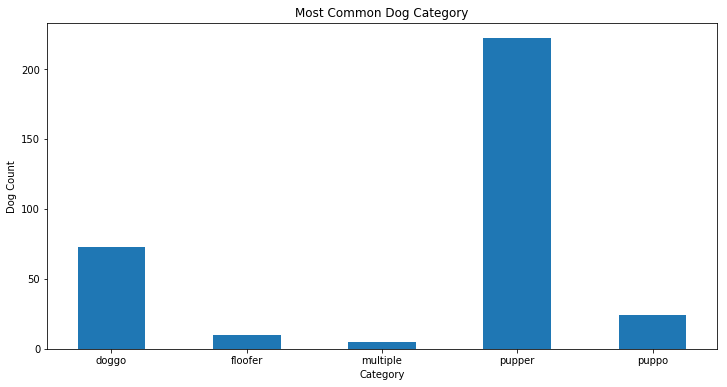

In [104]:
# plot dog category distribution
dog_type = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [222, 73, 24, 10, 5]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.5)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

In [105]:
# check dog breed distribution
master_df.dog_breed_prediction.value_counts()

golden_retriever              134
Labrador_retriever             91
Pembroke                       88
Chihuahua                      78
pug                            54
chow                           41
Samoyed                        40
Pomeranian                     38
toy_poodle                     37
malamute                       29
cocker_spaniel                 27
French_bulldog                 26
Chesapeake_Bay_retriever       23
miniature_pinscher             21
German_shepherd                20
Siberian_husky                 19
Staffordshire_bullterrier      19
Eskimo_dog                     18
Shetland_sheepdog              18
Shih-Tzu                       17
Maltese_dog                    17
beagle                         17
Cardigan                       17
Italian_greyhound              16
Rottweiler                     16
kuvasz                         15
Lakeland_terrier               15
Great_Pyrenees                 13
Pekinese                       13
vizsla        

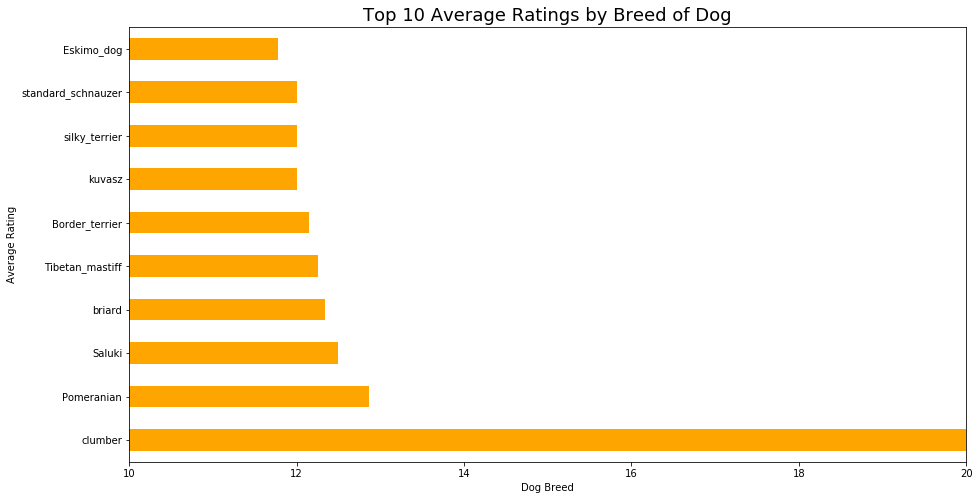

In [108]:
# plot top 10 average ratings by dog breed
fig = plt.figure(figsize=(15,8))
master_df.groupby('dog_breed_prediction')['rating'].mean().sort_values(ascending=True).nlargest(10).plot(kind ='barh',color ='orange')
plt.title("Top 10 Average Ratings by Breed of Dog",fontsize=18)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.xlim(10,20);

# Insights

In [115]:
# Most ratings are in the 9-13 range based on 10
# The most dog type tweeted is "pupper"
# Based on image predictions, the most popular dog is Golden Retriever
# Dumber has the highest average rating among all the dog breeds, however, the rating may represent an outlier value 
# Among all the dog breeds with the average rating within 20, Pomeranian has the highest average